In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# create toy input : 3 tokens, each with 4 features
np.random.seed(42)
x = np.random.rand(3, 4) # (seq_len=3, d_model=4)

In [4]:
# initialize random weight metrices for Q, K, V
Wq = np.random.rand(4, 4)
Wk = np.random.rand(4, 4)
Wv = np.random.rand(4, 4)

In [5]:
# compute Q, k, V
Q = x @ Wq
K = x @ Wk
V = x @ Wv

In [29]:
Q.shape, K.shape, V.shape

((3, 4), (3, 4), (3, 4))

In [8]:
# coupute dot-product attention scores  (scaled)
dk = Q.shape[-1]
scores = Q @ K.T / np.sqrt(dk)

In [34]:
print(dk)

4


In [27]:
scores.shape

(3, 3)

In [10]:
# Apply softmax to scores
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # for numerical stability
    return e_x / e_x.sum(axis=-1, keepdims=True)

In [30]:
attention_weights = softmax(scores)

In [31]:
attention_weights.shape

(3, 3)

In [12]:
output = attention_weights @ V

In [32]:
output.shape

(3, 4)

In [14]:
# Print everything
print("Input (x):\n", x)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)


Input (x):
 [[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]]

Query (Q):
 [[1.3219334  1.15058387 0.81214157 0.92159352]
 [0.60791226 0.80319098 0.28567062 0.5407419 ]
 [1.17076081 1.26362718 0.61482536 0.82276099]]

Key (K):
 [[0.57976316 1.28745385 1.66703152 1.69898438]
 [0.22597508 0.58985165 0.31495087 0.96590779]
 [0.52680695 1.18208936 1.09638025 1.56592774]]

Value (V):
 [[1.35737309 1.19621995 1.50328114 1.80128432]
 [0.2568779  0.35393259 0.27378562 0.53739594]
 [0.64783595 0.73764774 0.93008436 1.1959884 ]]


In [15]:
print("\nAttention Scores:\n", scores)
print("\nAttention Weights (Softmax):\n", attention_weights)
print("\nOutput (Attention * V):\n", output)


Attention Scores:
 [[2.58368526 1.06167843 2.19503074]
 [1.39072521 0.61170778 1.21483114]
 [2.3642085  0.99913319 2.03647591]]

Attention Weights (Softmax):
 [[0.52735889 0.11510842 0.35753269]
 [0.43524369 0.19971446 0.36504185]
 [0.5060941  0.12923692 0.36466898]]

Output (Attention * V):
 [[0.9770141  0.93531103 1.15681926 1.43938704]
 [0.87857753 0.86060494 1.04849229 1.32790919]
 [0.9564023  0.92013827 1.13535784 1.41721063]]


In [33]:
print(V[0])

[1.35737309 1.19621995 1.50328114 1.80128432]


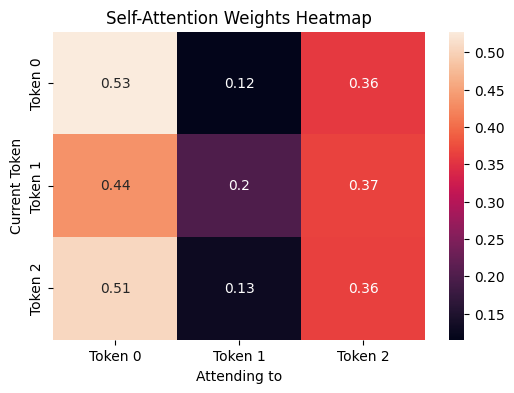

In [26]:
token_labels = ['Token 0', 'Token 1', 'Token 2']
plt.figure(figsize=(6,4))
sns.heatmap(attention_weights, annot=True, xticklabels=token_labels, yticklabels=token_labels)
plt.xlabel("Attending to")
plt.ylabel("Current Token")
plt.title("Self-Attention Weights Heatmap")
plt.show()